In [14]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
data = pd.read_csv('../data/cvd_transformed.csv')
data

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse,bmi_clasification,pulse_clasification
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30,Peso normal,2
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50,Obesidad,4
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60,Peso normal,4
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50,Sobrepeso,4
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,40,Peso normal,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61834,99988,20609,56.463014,1,159,72.0,130,90,2,2,0,0,1,0,28.479886,40,Sobrepeso,3
61835,99991,19699,53.969863,1,172,70.0,130,90,1,1,0,0,1,1,23.661439,40,Peso normal,3
61836,99993,19240,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,40,Sobrepeso,3
61837,99998,22431,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,55,Sobrepeso,4


In [3]:
# Define the features and target variable
features = ['age_year', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi', 'pulse']
X = data[features]
y = data['cardio']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [6]:
# Predict on test set
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for AUROC curve

# Evaluation 
print("Resultados de evaluación")
print("F-1 weighted: {}".format(f1_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("AUROC weighted: {}".format(roc_auc_score(y_test, y_pred, average='weighted')))

Resultados de evaluación
F-1 weighted: 0.60790273556231
Precision: 0.6687565308254964
Recall: 0.5572000696500087
AUROC weighted: 0.6589773933155704


In [12]:
# Matriz de confusión
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[5040 1585]
 [2543 3200]]


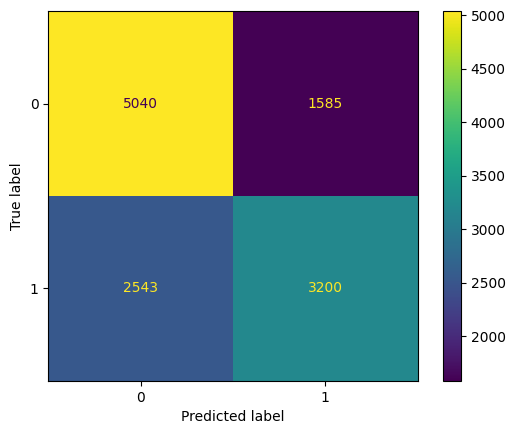

In [13]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

In [15]:
# Reporte de clasificación
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71      6625
           1       0.67      0.56      0.61      5743

    accuracy                           0.67     12368
   macro avg       0.67      0.66      0.66     12368
weighted avg       0.67      0.67      0.66     12368



Text(0.5, 0, 'False Positive Rate')

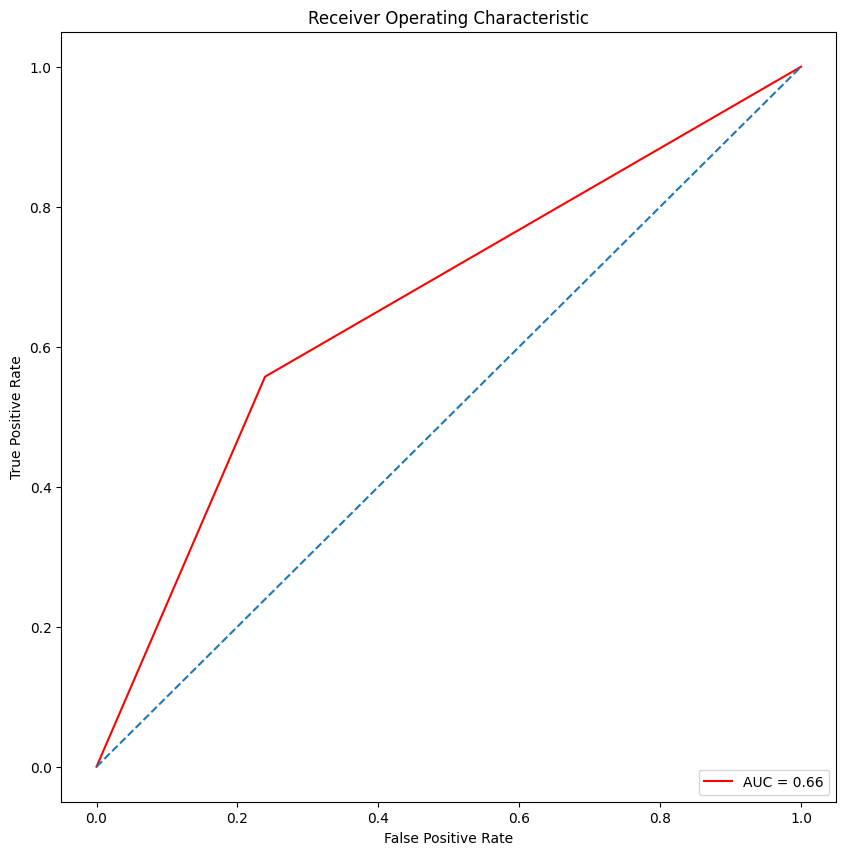

In [16]:
# Plot ROC curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred, average='weighted')
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % auc_roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')